In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import iradon, radon

%config InlineBackend.print_figure_kwargs = {'pad_inches':0} # NOT

def show(img , cmap = "gray"):
    plt.imshow(img , cmap)
    plt.axis("off")

Jupyter Capture Output v0.0.5


In [2]:
image_data = Image.open("ct_legs_scanner_360.png")
image_data = np.array(image_data.convert("RGBA")) 
image = rgb2gray(1-rgba2rgb(image_data))
image.min(),image.max()

(0.0, 1.0)

# Continuous

In [3]:
theta = np.linspace(0.+90, 180.+90, max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

(-0.5, 359.5, 359.5, -0.5)

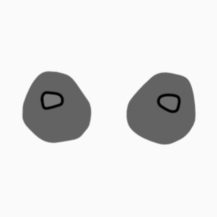

In [4]:
plt.imshow(-iradon(sinogram, theta=theta, filter_name='shepp-logan'),cmap="gray")
plt.axis("off")

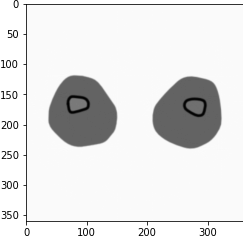

In [5]:
imgs = []
for i in range(0,20):
    fromangle = 18*i
    toangle = 18*i+18
    thetaX = theta[fromangle:toangle]
    sinogramX=sinogram[:,fromangle:toangle]
    filtered_imX = iradon(sinogramX, theta=thetaX, filter_name='shepp-logan')
    imgs.append(-filtered_imX)

keys = []
for i in range(0,len(imgs)):
    keys.append(f"img_{i+1:0>3}")
img_final = imgs[0]*0

for im in imgs:
    img_final += im

plt.imshow(img_final, cmap="gray")

In [6]:
json_datastack = []

for d in imgs:
    data = np.around(d, decimals=2)
    json_datastack.append(data)

json_content_compressed = dict(zip(keys, json_datastack))

In [8]:
from json import JSONEncoder

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

from pathlib import Path
import json
with Path("legs_continuous.json").open("w") as jsonFile:
    json.dump(json_content_compressed, jsonFile, indent=0, sort_keys=False,cls=NumpyArrayEncoder)

(-0.5, 359.5, 359.5, -0.5)

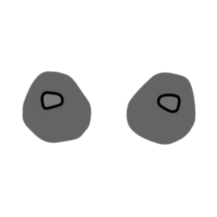

In [9]:
img_final = imgs[0]*0

for im in imgs:
    img_final += im

plt.imshow(np.clip((img_final)/20, -1,0), cmap="gray")
plt.axis("off")